# 训练

In [2]:
# ./scripts/mmdet_train.sh yolov3

# 变量定义

In [1]:
import glob
import os

# 参数
model_name = 'yolov3'
model_stru = ''
model_cfg = ''
exp_name = f'{model_name}{model_stru}{model_cfg}'

# 路径
cfg_path = f'cfg/mmdet/{model_name}.py'
best_model_path = f'runs/mmdetection/{exp_name}/train/'
exp_id = max([f for f in os.listdir(best_model_path) if os.path.isdir(os.path.join(best_model_path, f))])  # 最新实验
files = glob.glob(f'{best_model_path}/best_coco_bbox_mAP_epoch_*.pth')  # TODO: 按epoch数排序
best_model_path = files[0] if files else None
train_log_path = f'runs/mmdetection/{exp_name}/train/{exp_id}/vis_data/scalars.json'

print(f'{exp_name=}')
print(f'{best_model_path=}')
print(f'{train_log_path=}')


exp_name='yolov3'
best_model_path='runs/mmdetection/yolov3/train/best_coco_bbox_mAP_epoch_484.pth'
train_log_path='runs/mmdetection/yolov3/train/20231122_220736/vis_data/scalars.json'


# 优化
本代码只执行一次

In [2]:
import os

# 优化anchor
path_anchor = f'runs/mmdetection/{exp_name}/'
os.makedirs(path_anchor, exist_ok=True)

# 原始anchor 3rdparty/mmdetection/configs/yolo/yolov3_d53_8xb8-ms-608-273e_coco.py
# [(116, 90), (156, 198), (373, 326)],
# [(30, 61), (62, 45), (59, 119)],
# [(10, 13), (16, 30), (33, 23)]

! python 3rdparty/mmdetection/tools/analysis_tools/optimize_anchors.py \
    {cfg_path} \
    --device cuda:0 \
    --input-shape 640 640 \
    --algorithm k-means \
    --output-dir {path_anchor}


loading annotations into memory...
Done (t=0.03s)
creating index...
index created!
11/23 20:27:47 - mmengine - INFO - Collecting bboxes from annotation...
[>>>>>>>>>>>>>>>>>>>>>>>] 11544/11544, 55014.3 task/s, elapsed: 0s, ETA:     0s

11/23 20:27:47 - mmengine - INFO - Collected 11544 bboxes.
11/23 20:27:47 - mmengine - INFO - Start cluster 9 YOLO anchors with K-means...
[>>>                         ] 130/1000, 594.8 task/s, elapsed: 0s, ETA:     1s11/23 20:27:47 - mmengine - INFO - K-means process has converged at iter 130.


11/23 20:27:47 - mmengine - INFO - Anchor cluster finish. Average IOU: 0.7239605188369751
11/23 20:27:47 - mmengine - INFO - Anchor optimize result:[[10, 14], [19, 18], [25, 30], [39, 21], [45, 40], [73, 51], [115, 73], [191, 110], [350, 182]]
11/23 20:27:47 - mmengine - INFO - Result saved in runs/mmdetection/yolov3/anchor_optimize_result.json


In [3]:
import json

output = []
with open(path_anchor+"/anchor_optimize_result.json", 'r') as f:
    anchors = json.load(f)
    for anchor in anchors:
        output.append(tuple(anchor))
print(f"原始输出: {anchors}")

print("可复制格式: ")
print(f"{output[0+6:3+6]},")
print(f"{output[0+3:3+3]},")
print(output[0:3])

# 优化后
# [(120, 76), (198, 113), (366, 188)],
# [(42, 22), (46, 41), (75, 52)],
# [(10, 14), (19, 19), (26, 31)]


原始输出: [[10, 14], [19, 18], [25, 30], [39, 21], [45, 40], [73, 51], [115, 73], [191, 110], [350, 182]]
可复制格式: 
[(115, 73), (191, 110), (350, 182)],
[(39, 21), (45, 40), (73, 51)],
[(10, 14), (19, 18), (25, 30)]


: 

# 日志分析

['lr', 'data_time', 'grad_norm', 'loss', 'loss_cls', 'loss_conf', 'loss_xy', 'loss_wh', 'time', 'iter', 'memory', 'step']
['coco/bbox_mAP', 'coco/bbox_mAP_50', 'coco/bbox_mAP_75', 'coco/bbox_mAP_s', 'coco/bbox_mAP_m', 'coco/bbox_mAP_l', 'data_time', 'time']
最大map: (484)0.924


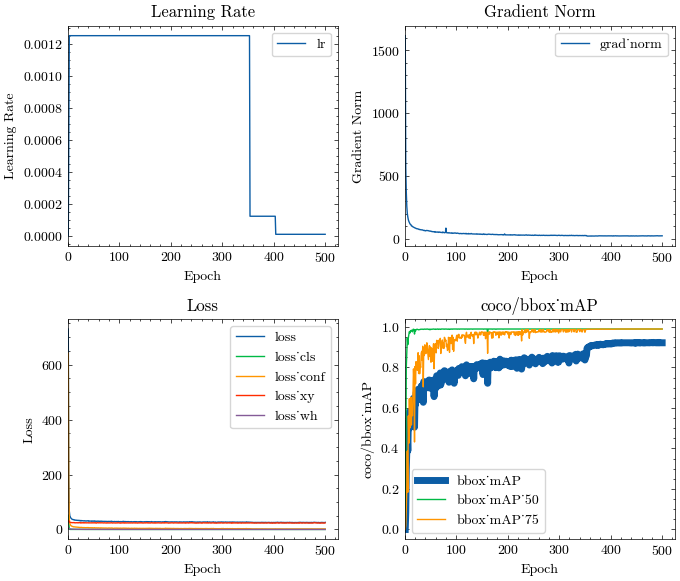

In [7]:
from src.utils.read import read_mmdet_train_log_json
from src.utils.plot import plot_mmdet_yolov3_train_log

df_train, df_val = read_mmdet_train_log_json(train_log_path)
plot_mmdet_yolov3_train_log(df_train, df_val, exp_name=exp_name)

# 测试

In [10]:
! scripts/mmdet_test.sh {cfg_path} {best_model_path} {exp_name}

11/23 19:40:27 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.9.7 | packaged by conda-forge | (default, Sep 29 2021, 19:23:11) [GCC 9.4.0]
    CUDA available: True
    numpy_random_seed: 0
    GPU 0,1,2,3,4,5,6,7,8,9: NVIDIA GeForce RTX 3090
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.7, V11.7.99
    GCC: gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
    PyTorch: 2.1.0+cu118
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v3.1.1 (Git Hash 64f6bcbcbab628e96f33a62c3e975f8535a7bde4)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX512
  - CUDA Runtime 11.8
  - NVCC architecture flags: -gencode;arch=compute_

# 评估

In [11]:
# 提供两种测试评价方案，结果一致
# 方式1: pycocotools
import pandas as pd
from src.utils.metric import coco_metrics_name
from src.utils.metric import cal_coco_metrics

# 保存评价结果对象
coco_evals = {}
# 构造dataframe
all_metrics = {}

# 在各测试集进行推理
for data_type in ['test_synth', 'test_real_nominal', 'test_real_edge']:

    print(f'正在评价: {data_type}')
    annotation_file = f'datasets/lard/annotations/instances_{data_type}.json'
    prediction_file = f'runs/mmdetection/{exp_name}/test/coco_detection/prediction_{data_type}.bbox.json'
    cocoEval = cal_coco_metrics(annotation_file, prediction_file)
    coco_evals[data_type] = cocoEval
    all_metrics[data_type] = cocoEval.stats

all_metrics = pd.DataFrame(all_metrics, index=coco_metrics_name)
display(all_metrics.round(3))


# 方式2: eval_metric.py
# ! python 3rdparty/mmdetection/tools/analysis_tools/eval_metric.py \
#     {cfg_path} \
#     runs/mmdetection/{exp_name}/test/coco_detection/prediction_test_synth.pkl \
#     --cfg-options \
#     test_evaluator.format_only=False

正在评价: test_synth
loading annotations into memory...
Done (t=0.03s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.02s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.78s).
Accumulating evaluation results...
DONE (t=0.14s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.726
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.938
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.838
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.573
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.802
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.770
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.772
 Average Recall     (AR) @[ IoU=0.50:0.95 | are

,test_synth,test_real_nominal,test_real_edge
"AP (IoU=0.50:0.95, area=all, maxDets=100)",0.726,0.523,0.240
"AP (IoU=0.50, area=all, maxDets=100)",0.938,0.733,0.358
"AP (IoU=0.75, area=all, maxDets=100)",0.838,0.580,0.268
"AP (IoU=0.50:0.95, area=small, maxDets=100)",-1.000,0.167,0.137
"AP (IoU=0.50:0.95, area=medium, maxDets=100)",0.573,0.371,0.159
"AP (IoU=0.50:0.95, area=large, maxDets=100)",0.802,0.751,0.316
"AR (IoU=0.50:0.95, area=all, maxDets=1)",0.770,0.551,0.270
"AR (IoU=0.50:0.95, area=all, maxDets=10)",0.772,0.572,0.298
"AR (IoU=0.50:0.95, area=all, maxDets=100)",0.772,0.572,0.298
"AR (IoU=0.50:0.95, area=small, maxDets=100)",-1.000,0.218,0.163


test_synth


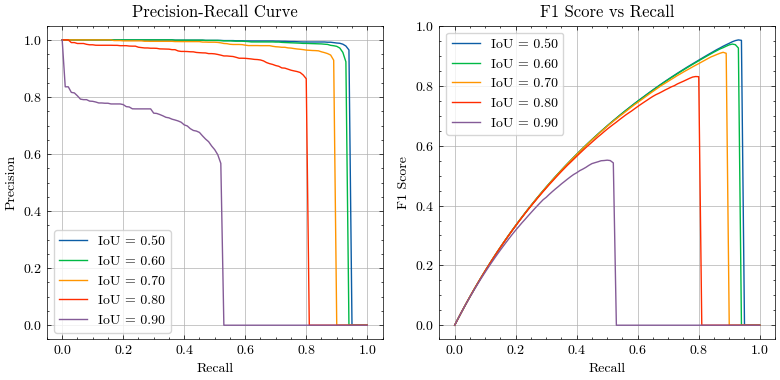

test_real_nominal


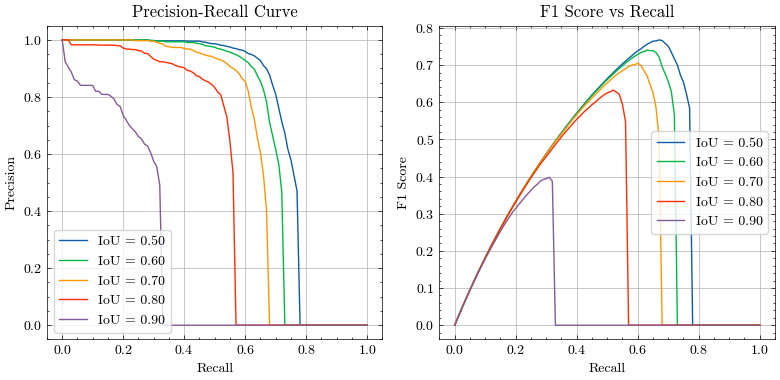

test_real_edge


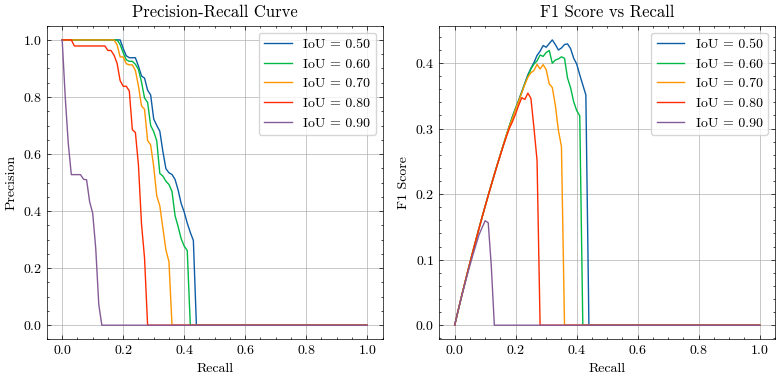

In [12]:
from src.utils.plot import plot_pr_curve

plot_pr_curve(coco_evals, iou_indices=[0, 2, 4, 6, 8], exp_name=exp_name)

# 测速

In [13]:
! scripts/mmdet_speed.sh {cfg_path} {best_model_path}

11/23 19:49:37 - mmengine - INFO - before build: 
11/23 19:49:38 - mmengine - INFO - (GB) mem_used: 4.00 | uss: 0.40 | pss: 0.41 | total_proc: 1
Loads checkpoint by local backend from path: runs/mmdetection/yolov3/train/best_coco_bbox_mAP_epoch_484.pth
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
11/23 19:49:39 - mmengine - INFO - after build: 
11/23 19:49:39 - mmengine - INFO - (GB) mem_used: 4.25 | uss: 0.68 | pss: 0.69 | total_proc: 1
11/23 19:50:09 - mmengine - INFO - ==================================
11/23 19:50:09 - mmengine - INFO - Done image [500/2000], fps: 82.8 img/s, times per image: 12.1 ms/img, cuda memory: 387 MB
11/23 19:50:09 - mmengine - INFO - (GB) mem_used: 5.13 | uss: 1.82 | pss: 1.83 | total_proc: 1
11/23 19:50:37 - mmengine - INFO - ==================================
11/23 19:50:37 - mmengine - INFO - Done image [1000/2000], fps: 81.8 img/s, times per image: 12.2 ms/img, cuda memory: 387 MB
11/23 19:50:37 - mmengine - INFO -

In [14]:
# 11/23 19:51:36 - mmengine - INFO - ============== Done ==================
# 11/23 19:51:36 - mmengine - INFO - Overall fps: 82.4 img/s, times per image: 12.1 ms/img

# 11/23 19:53:53 - mmengine - INFO - ============== Done ==================
# 11/23 19:53:53 - mmengine - INFO - Overall fps: 86.9 img/s, times per image: 11.5 ms/img

# 11/23 19:54:28 - mmengine - INFO - ============== Done ==================
# 11/23 19:54:28 - mmengine - INFO - Overall fps: 88.3 img/s, times per image: 11.3 ms/img

In [15]:
# 保存结果
all_speed = {
    'test_synth': [12.1, 82.4],  # [average_time, fps]
    'test_real_nominal': [11.5, 86.9],
    'test_real_edge': [11.3, 88.3]
}

# 构建dataframe
all_speed = pd.DataFrame(
    data=all_speed,
    index=['Average inference time (ms)', 'FPS']
)

# 合并测试指标
results = pd.concat([all_metrics, all_speed], axis=0)
results.index.name = 'metrics'
results.to_csv(
    f'results/tables/metrics/metrics_{exp_name}.csv', 
    float_format='%.3f')

# 写入检测结果

In [17]:
from src.utils.database import write_detections_2_database
write_detections_2_database(lib_type='mmdetection', exp_name=exp_name)


loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


正在写入test_synth检测结果: 100%|██████████████████████████████| 2212/2212 [00:06<00:00, 365.29it/s]


predictions_yolov3: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


正在写入test_real_nominal检测结果: 100%|███████████████████████| 1500/1500 [00:03<00:00, 380.28it/s]


predictions_yolov3: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


正在写入test_real_edge检测结果: 100%|████████████████████████████| 311/311 [00:00<00:00, 424.58it/s]

predictions_yolov3: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)


In [2]:
from src.utils.database import delete_detections_from_database
delete_detections_from_database(exp_name=exp_name)


删除字段: ['predictions_yolov3_train_val']
删除字段: ['predictions_yolov3_train_val']
删除字段: ['predictions_yolov3_train_val']
